# COMENTAR, QUITAR COLS Y PROBAR RANDOM


## Nepal Earthquake.

Vamos a tratar de predecir la variable ordinal "damage_grade", que representa el nivel de daño a un edificio que fue golpeado por un terremoto. Hay 3 grados de daño:

1. representa un daño bajo
2. representa una cantidad moderada de daño
3. representa una destrucción casi completa.

## Descripción de las variables.



*   geo_level_1_id, geo_level_2_id, geo_level_3_id (tipo: int): región geográfica en la que se encuentra el edificio, desde la más grande (nivel 1) hasta la subregión más específica (nivel 3). Valores posibles: nivel 1: 0-30, nivel 2: 0-1427, nivel 3: 0-12567.
*   count_floors_pre_eq (tipo: int): número de pisos del edificio antes del terremoto.
*   age (tipo: int): edad del edificio en años.
*   area_percentage (tipo: int): área normalizada de la huella del edificio.
*   height_percentage (tipo: int): altura normalizada de la huella del edificio.
*   land_surface_condition (tipo: categórico): condición de la superficie del suelo donde se construyó el edificio. Valores posibles: n, o, t.
*   foundation_type (tipo: categórico): tipo de cimentación utilizada durante la construcción. Valores posibles: h, i, r, u, w.
*   roof_type (tipo: categórico): tipo de techo utilizado durante la construcción. Valores posibles: n, q, x.
*   ground_floor_type (tipo: categórico): tipo de piso de planta baja. Valores posibles: f, m, v, x, z.
*   other_floor_type (tipo: categórico): tipo de construcciones utilizadas en pisos superiores al de la planta baja (excepto el techo). Valores posibles: j, q, s, x.
*   position (tipo: categórico): posición del edificio. Valores posibles: j, o, s, t.
*   plan_configuration (tipo: categórico): configuración del plan de construcción. Valores posibles: a, c, d, f, m, n, o, q, s, u.



*   has_superstructure_adobe_mud (tipo: binario): variable indicadora que indica si la superestructura estaba hecha de Adobe/Barro.
*   has_superstructure_mud_mortar_stone (tipo: binario): variable indicadora que indica si la superestructura estaba hecha de Mortero de Barro - Piedra.
*   has_superstructure_stone_flag (tipo: binario): variable indicadora que indica si la superestructura estaba hecha de Piedra.
*   has_superstructure_cement_mortar_stone (tipo: binario): variable indicadora que indica si la superestructura estaba hecha de Mortero de Cemento - Piedra.
*   has_superstructure_mud_mortar_brick (tipo: binario): variable indicadora que indica si la superestructura estaba hecha de Mortero de Barro - Ladrillo.
*   has_superstructure_cement_mortar_brick (tipo: binario): variable indicadora que indica si la superestructura estaba hecha de Mortero de Cemento - Ladrillo.
*   has_superstructure_timber (tipo: binario): variable indicadora que indica si la superestructura estaba hecha de Madera.
*   has_superstructure_bamboo (tipo: binario): variable indicadora que indica si la superestructura estaba hecha de Bambú.
*   has_superstructure_rc_non_engineered (tipo: binario): variable indicadora que indica si la superestructura estaba hecha de concreto armado no estructurado.
*   has_superstructure_rc_engineered (tipo: binario): variable indicadora que indica si la superestructura estaba hecha de concreto armado no estructurado.
*   has_superstructure_other (tipo: binario): variable de bandera que indica si la superestructura estaba hecha de algún otro material.
*   legal_ownership_status (tipo: categórico): estado legal de propiedad del terreno donde se construyó el edificio. Posibles valores: a, r, v, w.
*   count_families (tipo: entero): número de familias que viven en el edificio.
has_secondary_use (tipo: binario): variable de bandera que indica si el edificio se usó para algún propósito secundario.
*   has_secondary_use_agriculture (tipo: binario): variable de bandera que indica si el edificio se usó para fines agrícolas.
*   has_secondary_use_hotel (tipo: binario): variable de bandera que indica si el edificio se usó como hotel.
*   has_secondary_use_rental (tipo: binario): variable de bandera que indica si el edificio se usó para fines de alquiler.
*   has_secondary_use_institution (tipo: binario): variable de bandera que indica si el edificio se usó como una ubicación de alguna institución.
*   has_secondary_use_school (tipo: binario): variable de bandera que indica si el edificio se usó como escuela.
*   has_secondary_use_industry (tipo: binario): variable de bandera que indica si el edificio se usó para fines industriales.
*   has_secondary_use_health_post (tipo: binario): variable de bandera que indica si el edificio se usó como puesto de salud.
*   has_secondary_use_gov_office (tipo: binario): variable de bandera que indica si el edificio se usó como oficina gubernamental.
*   has_secondary_use_use_police (tipo: binario): variable de bandera que indica si el edificio se usó como estación de policía.
*   has_secondary_use_other (tipo: binario): variable de bandera que indica si el edificio se usó secundariamente para otros propósitos.
























# Carga del csv.

Cargamos los csv que están alojado en mi repositorio de github para éste problema del daño que puede recibir una casa en Nepal en base a los datos recogidos en 2015 tras el terremoto de Nepal.
En la competición nos han facilitado los datos de train tanto X e y, y los datos de Test para predecir.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import MaxAbsScaler

url = 'https://raw.githubusercontent.com/alexander6779/SNS/main/TerremotoNepal/Data/'

x_train = pd.read_csv(url+'train_values.csv',sep=',')
y_train = pd.read_csv(url+'train_labels.csv',sep=',')
X_test =  pd.read_csv(url+'test_values.csv',sep=',')
x_train

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30                6                  5   
1                         2   10                8                  7   
2                         2   10                5                  5   
3                         2   10                6                  5   
4                         3   30                8                  9   
...                     ...  ...              ...                ...   
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

       land_surface_condition foundation_type  ...  \
0                           t               r  ...   
1                           o               r  ...   
2                           t               r  ...   
3                           t               r  ...   
4                           t               r  ...   
...                       ...             ...  ...   
260596                      n               r  ...   
260597                      t               r  ...   
260598                      t               r  ...   
260599                      t               r  ...   
260600                      n               r  ...   

       has_secondary_use_agriculture has_secondary_use_hotel  \
0                                  0                       0   
1                                  0                       0   
2                                  0                       0   
3                                  0                       0   
4                                  0                       0   
...                              ...                     ...   
260596                             0                       0   
260597                             0                       0   
260598                             0                       0   
260599                             0                       0   
260600                             0                       0   

       has_secondary_use_rental has_secondary_use_institution  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   
...                         ...                           ...   
260596                        0                             0   
260597                        0                             0   
260598                        0                             0   
260599                        0                             0   
260600                        0                             0   

       has_secondary_use_school  has_secondary_use_industry  \
0                           

In [ ]:
y_train

building_id  damage_grade
0            802906             3
1             28830             2
2             94947             3
3            590882             2
4            201944             3
...             ...           ...
260596       688636             2
260597       669485             3
260598       602512             3
260599       151409             2
260600       747594             3

[260601 rows x 2 columns]

In [ ]:
X_test

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0           300051              17             596           11307   
1            99355               6             141           11987   
2           890251              22              19           10044   
3           745817              26              39             633   
4           421793              17             289            7970   
...            ...             ...             ...             ...   
86863       310028               4             605            3623   
86864       663567              10            1407           11907   
86865      1049160              22            1136            7712   
86866       442785               6            1041             912   
86867       501372              26              36            6436   

       count_floors_pre_eq  age  area_percentage  height_percentage  \
0                        3   20                7                  6   
1                        2   25               13                  5   
2                        2    5                4                  5   
3                        1    0               19                  3   
4                        3   15                8                  7   
...                    ...  ...              ...                ...   
86863                    3   70               20                  6   
86864                    3   25                6                  7   
86865                    1   50                3                  3   
86866                    2    5                9                  5   
86867                    2   10               11                  4   

      land_surface_condition foundation_type  ...  \
0                          t               r  ...   
1                          t               r  ...   
2                          t               r  ...   
3                          t               r  ...   
4                          t               r  ...   
...                      ...             ...  ...   
86863                      t               r  ...   
86864                      n               r  ...   
86865                      t               r  ...   
86866                      t               r  ...   
86867                      t               r  ...   

      has_secondary_use_agriculture has_secondary_use_hotel  \
0                                 0                       0   
1                                 1                       0   
2                                 0                       0   
3                                 0                       0   
4                                 0                       0   
...                             ...                     ...   
86863                             1                       0   
86864                             0                       0   
86865                             0                       0   
86866                             0                       0   
86867                             0                       0   

      has_secondary_use_rental has_secondary_use_institution  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            1                             0   
4                            0                             0   
...                        ...                           ...   
86863                        0                             0   
86864                        0                             0   
86865                        0                             0   
86866                        0                             0   
86867                        0                             0   

      has_secondary_use_school  has_secondary_use_industry  \
0                            0                           0   
1                         

# Estadística de datos.

In [ ]:
x_train.describe()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
count  2.606010e+05   260601.000000   260601.000000   260601.000000   
mean   5.256755e+05       13.900353      701.074685     6257.876148   
std    3.045450e+05        8.033617      412.710734     3646.369645   
min    4.000000e+00        0.000000        0.000000        0.000000   
25%    2.611900e+05        7.000000      350.000000     3073.000000   
50%    5.257570e+05       12.000000      702.000000     6270.000000   
75%    7.897620e+05       21.000000     1050.000000     9412.000000   
max    1.052934e+06       30.000000     1427.000000    12567.000000   

       count_floors_pre_eq            age  area_percentage  height_percentage  \
count        260601.000000  260601.000000    260601.000000      260601.000000   
mean              2.129723      26.535029         8.018051           5.434365   
std               0.727665      73.565937         4.392231           1.918418   
min               1.000000       0.000000         1.000000           2.000000   
25%               2.000000      10.000000         5.000000           4.000000   
50%               2.000000      15.000000         7.000000           5.000000   
75%               2.000000      30.000000         9.000000           6.000000   
max               9.000000     995.000000       100.000000          32.000000   

       has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  ...  \
count                 260601.000000                        260601.000000  ...   
mean                       0.088645                             0.761935  ...   
std                        0.284231                             0.425900  ...   
min                        0.000000                             0.000000  ...   
25%                        0.000000                             1.000000  ...   
50%                        0.000000                             1.000000  ...   
75%                        0.000000                             1.000000  ...   
max                        1.000000                             1.000000  ...   

       has_secondary_use_agriculture  has_secondary_use_hotel  \
count                  260601.000000            260601.000000   
mean                        0.064378                 0.033626   
std                         0.245426                 0.180265   
min                         0.000000                 0.000000   
25%                         0.000000                 0.000000   
50%                         0.000000                 0.000000   
75%                         0.000000                 0.000000   
max                         1.000000                 1.000000   

       has_secondary_use_rental  has_secondary_use_institution  \
count             260601.000000                  260601.000000   
mean                   0.008101                       0.000940   
std                    0.089638                       0.030647   
min                    0.000000                       0.000000   
25%                    0.000000                       0.000000   
50%                    0.000000                       0.000000   
75%                    0.000000                       0.000000   
max                    1.000000                       1.000000   

       has_secondary_use_school  has_secondary_use_industry  \
count             260601.000000               260601.000000   
mean                   0.000361                    0.001071   
std                    0.018989                    0.032703   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    0.000000   
max                    1.000000                    1.000000   

       has_secondary_use_health_post  has_secondary_use_gov_office  \
count                  260601.000000                 260601.000000   
mean               

# Mostrar información de los datos.

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

# Limpieza de datos nulos

In [ ]:
x_train.dropna(inplace=True)
y_train.dropna(inplace=True)
X_test.dropna(inplace=True)
x_train

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30                6                  5   
1                         2   10                8                  7   
2                         2   10                5                  5   
3                         2   10                6                  5   
4                         3   30                8                  9   
...                     ...  ...              ...                ...   
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

       land_surface_condition foundation_type  ...  \
0                           t               r  ...   
1                           o               r  ...   
2                           t               r  ...   
3                           t               r  ...   
4                           t               r  ...   
...                       ...             ...  ...   
260596                      n               r  ...   
260597                      t               r  ...   
260598                      t               r  ...   
260599                      t               r  ...   
260600                      n               r  ...   

       has_secondary_use_agriculture has_secondary_use_hotel  \
0                                  0                       0   
1                                  0                       0   
2                                  0                       0   
3                                  0                       0   
4                                  0                       0   
...                              ...                     ...   
260596                             0                       0   
260597                             0                       0   
260598                             0                       0   
260599                             0                       0   
260600                             0                       0   

       has_secondary_use_rental has_secondary_use_institution  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   
...                         ...                           ...   
260596                        0                             0   
260597                        0                             0   
260598                        0                             0   
260599                        0                             0   
260600                        0                             0   

       has_secondary_use_school  has_secondary_use_industry  \
0                           

Observamos que no hay ningún cambio, lo cuál significa que no hay valores nulos.

# Transformación de datos

Creamos diccionarios, con los valores posibles de los campos categóricos y asignamos un valor numérico.
Luego, creamos una función para asigar dichos valores en el dataframe.

In [ ]:
land_surface_condition = {'n':0,'o':1,'t':2}
foundation_type = {'h':0,'i':1,'r':2,'u':3,'w':4}
roof_type = {'n':0,'q':1,'x':2}
ground_floor_type = {'f':0,'m':1,'v':2,'x':3,'z':4}
other_floor_type = {'j':0,'q':1,'s':2,'x':3}
position = {'j':0,'o':1,'s':2,'t':3}
plan_configuration = {'a':0,'c':1,'d':2,'f':3,'m':4,'n':5,'o':6,'q':7,'s':8,'u':9}
legal_ownership_status = {'a':0,'r':1,'v':2,'w':3}      

In [ ]:
def fromCatToNum(datafram):
  datafram['land_surface_condition'] = datafram['land_surface_condition'].map(land_surface_condition)
  datafram['foundation_type'] = datafram['foundation_type'].map(foundation_type)
  datafram['roof_type'] = datafram['roof_type'].map(roof_type)
  datafram['ground_floor_type'] = datafram['ground_floor_type'].map(ground_floor_type)
  datafram['other_floor_type'] = datafram['other_floor_type'].map(other_floor_type)
  datafram['position'] = datafram['position'].map(position)
  datafram['plan_configuration'] = datafram['plan_configuration'].map(plan_configuration)
  datafram['legal_ownership_status'] = datafram['legal_ownership_status'].map(legal_ownership_status)

In [ ]:
fromCatToNum(x_train)
fromCatToNum(X_test)

Vemos como los tipos de datos de las variables son todos enteros, y ya están están listos para poder visualizar y empezar a manejar los datos. 

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   building_id                             260601 non-null  int64
 1   geo_level_1_id                          260601 non-null  int64
 2   geo_level_2_id                          260601 non-null  int64
 3   geo_level_3_id                          260601 non-null  int64
 4   count_floors_pre_eq                     260601 non-null  int64
 5   age                                     260601 non-null  int64
 6   area_percentage                         260601 non-null  int64
 7   height_percentage                       260601 non-null  int64
 8   land_surface_condition                  260601 non-null  int64
 9   foundation_type                         260601 non-null  int64
 10  roof_type                               260601 non-null  int64
 11  

# Matriz de correlación

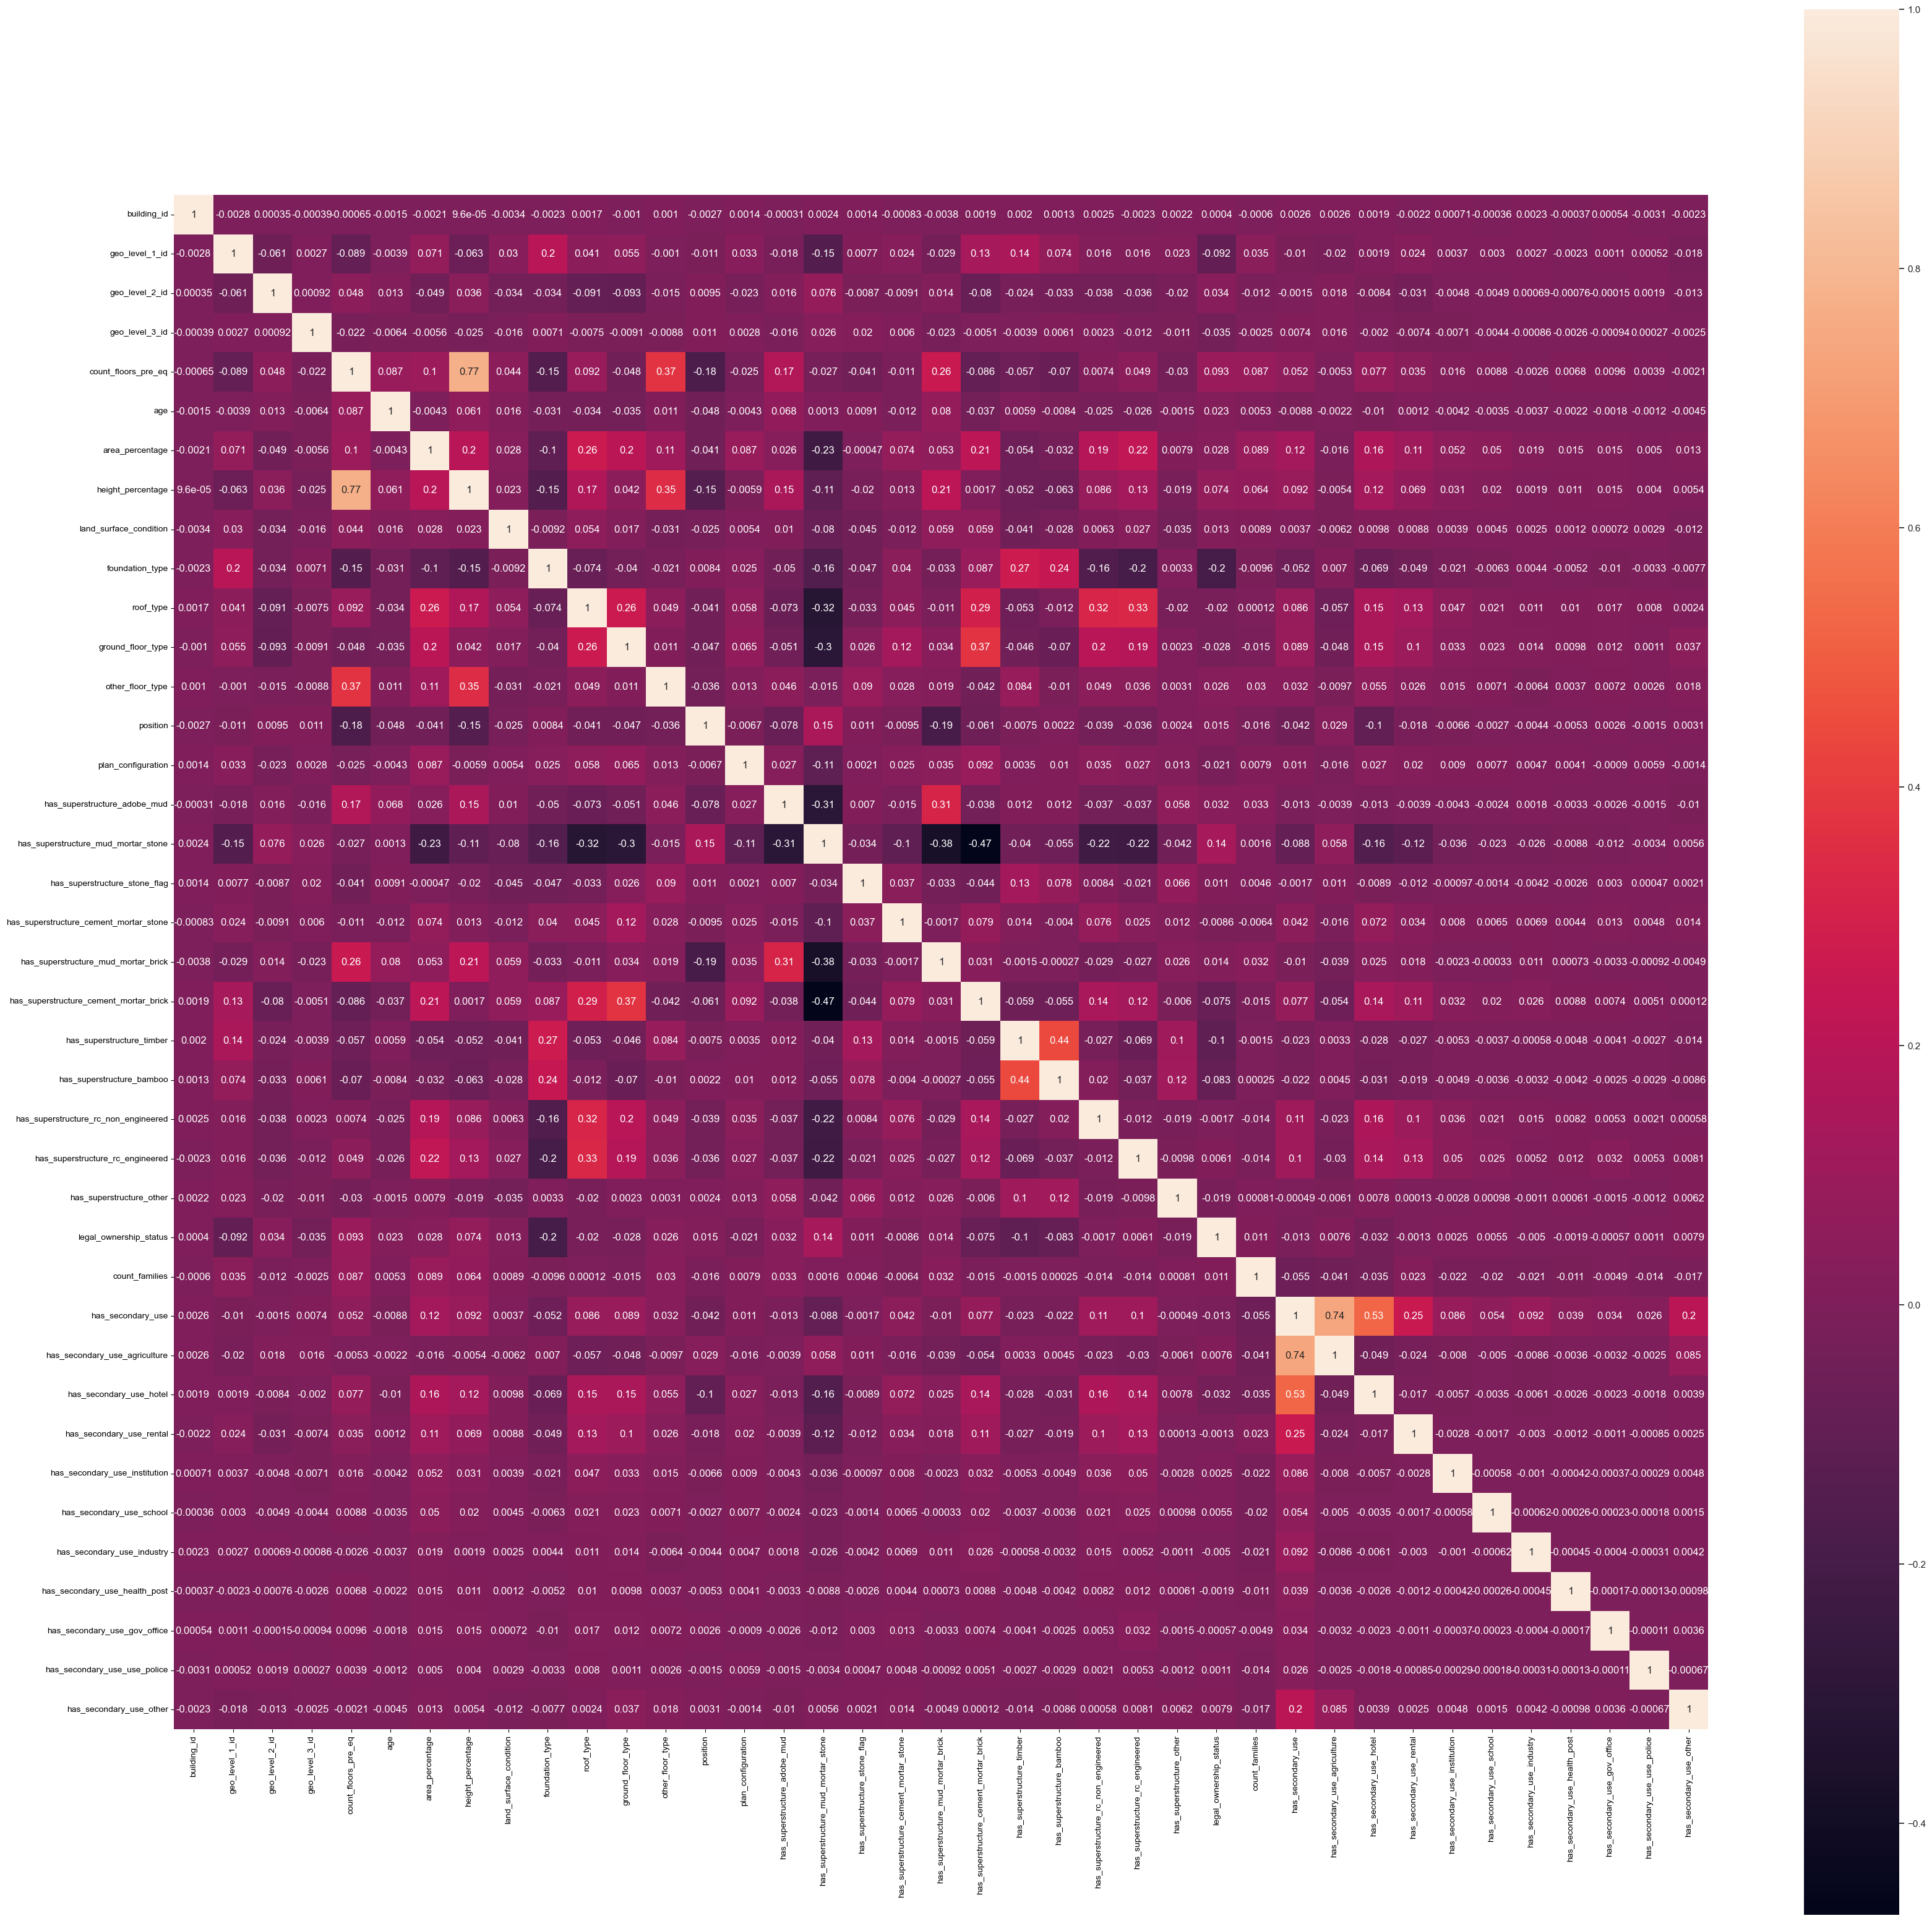

In [ ]:
fig,ax = plt.subplots(figsize=(40,40))
sns.set()
sns.heatmap(x_train.corr(), square=True, annot=True)
plt.show()

Finalmente visto que voy a ser 3 modelos para entrenar y predecir, por tanto no me voy a arriesgar a perder información que para unos modelos puede ser innecesario o un riesgo que puede asumir, pero que para otros es demasiado útil ya que el proceso de entrenamiento de cada entrenamiento es distinto.



# Reducción de datos

Primero de todo las casas que tengan 0 años las voy a comtemplar en mi conjunto de datos debido a que una construcción tarda principalmente entre 11 o 12 meses empezandola desde 0.Además, si ya es prefabricada se tarda entre 4 o 6 meses.

Aquí enlace que lo avala https://cmyk-arq.es/construir-una-casa-cuanto-tiempo-se-tarda/

Creo un dataframe uniendo x_train e y_train

In [ ]:
df = pd.concat([x_train, y_train['damage_grade']], axis=1)

In [ ]:
df

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30                6                  5   
1                         2   10                8                  7   
2                         2   10                5                  5   
3                         2   10                6                  5   
4                         3   30                8                  9   
...                     ...  ...              ...                ...   
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

        land_surface_condition  foundation_type  ...  has_secondary_use_hotel  \
0                            2                2  ...                        0   
1                            1                2  ...                        0   
2                            2                2  ...                        0   
3                            2                2  ...                        0   
4                            2                2  ...                        0   
...                        ...              ...  ...                      ...   
260596                       0                2  ...                        0   
260597                       2                2  ...                        0   
260598                       2                2  ...                        0   
260599                       2                2  ...                        0   
260600                       0                2  ...                        0   

        has_secondary_use_rental  has_secondary_use_institution  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   
...                          ...                            ...   
260596                         0                              0   
260597                         0                              0   
260598                         0                              0   
260599                         0                              0   
260600                         0                              0   

        has_secondary_use_school  has_secondary_use_industry  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   
...                          ...                         ...   
260596                         0                           0   


# Mi algoritmo para la selección de datos y reducir volumen.

Visto que los geo levels siginifican ubicación de las casas, ya sea de manera provincial o municipal, he decidido hacer una obtención de datos en forma de árbol, es decir, en vez de realizar una mediana, divido el total de cada geolocalización en 3 puntos, porque la principal geolocalización es la que se refiere a las regiones principales y son 30,luego con ello creo esa subdivisión de 3 regiones, dicho esto, divido los otros 2 geo_level entre 3 también,generando esas 3 regiones en cada unos de ellos, luego hago una inserción en árbol, cogiendo por cada region principal las datos de cada sub región de la siguiente manera:

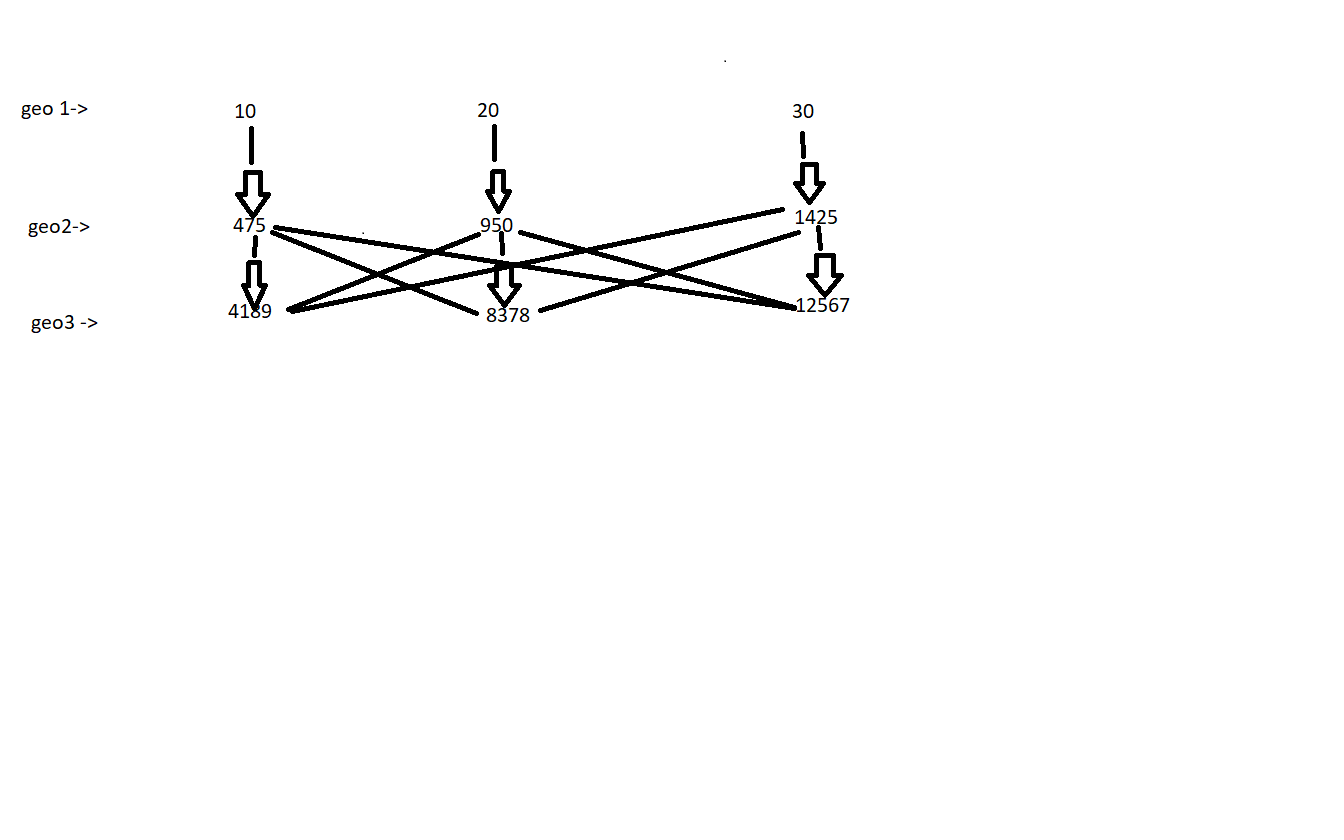

Debido a que ésta es mi primera versión, trato esta serie de combinaciones, luego má adelantes se podrían generar más combinaciones que no estoy tratando actualmente, como: 0 <= 10 -> 0 < 475 <= 950 -> 0 <= 4189 y las otras combinaciones restantes.
Luego aún teniendo estas combinaciones, el siguiente paso es coger una parte de datos, en mi caso voy a coger los 1000 primeros,después aplico una obtención de datos en la cuál quiero que de todas esas filas un 30% tengan un damage grade de 1, otro 30% con 3 y un 40% de 2 agrupándolos.
Finalmente, me aseguro que no hayan duplicados borrándolos y creo X e y.

In [ ]:
levels = ['geo_level_1_id','geo_level_2_id','geo_level_3_id']

geo1 = df.loc[(df[levels[0]]<=10) & (df[levels[1]]<=475) & (df[levels[2]]<=4189)]
geo1_2 = df.loc[(df[levels[0]]<=10) & (df[levels[1]]<=475) & (df[levels[2]]>4189) & (df[levels[2]]<=8378)]
geo1_3 = df.loc[(df[levels[0]]<=10) & (df[levels[1]]<=475) & (df[levels[2]]>8378) & (df[levels[2]]<=12567)]
geo1_4 = df.loc[(df[levels[0]]<=10) & (df[levels[1]]>475) & (df[levels[1]]<=950) & (df[levels[2]]<=4189)]
geo1_5 = df.loc[(df[levels[0]]<=10) & (df[levels[1]]>475) & (df[levels[1]]<=950) & (df[levels[2]]>4189) & (df[levels[2]]<=8378)]
geo1_6 = df.loc[(df[levels[0]]<=10) & (df[levels[1]]>475) & (df[levels[1]]<=950) & (df[levels[2]]>8378) & (df[levels[2]]<=12567)]
geo1_7 = df.loc[(df[levels[0]]<=10) & (df[levels[1]]>950) & (df[levels[1]]<=1425) & (df[levels[2]]<=4189)]
geo1_8 = df.loc[(df[levels[0]]<=10) & (df[levels[1]]>950) & (df[levels[1]]<=1425) & (df[levels[2]]>4189) & (df[levels[2]]<=8378)]
geo1_9 = df.loc[(df[levels[0]]<=10) & (df[levels[1]]>950) & (df[levels[1]]<=1425) & (df[levels[2]]>8378) & (df[levels[2]]<=12567)]

In [ ]:
geo2 = df.loc[(df[levels[0]]<=10) & (df[levels[0]]<=20) & (df[levels[1]]<=475) & (df[levels[2]]<=4189)]
geo2_2 = df.loc[(df[levels[0]]<=10) & (df[levels[0]]<=20) & (df[levels[1]]<=475) & (df[levels[2]]>4189) & (df[levels[2]]<=8378)]
geo2_3 = df.loc[(df[levels[0]]<=10) & (df[levels[0]]<=20) & (df[levels[1]]<=475) & (df[levels[2]]>8378) & (df[levels[2]]<=12567)]
geo2_4 = df.loc[(df[levels[0]]<=10) & (df[levels[0]]<=20) & (df[levels[1]]>475) & (df[levels[1]]<=950) & (df[levels[2]]<=4189)]
geo2_5 = df.loc[(df[levels[0]]<=10) & (df[levels[0]]<=20) & (df[levels[1]]>475) & (df[levels[1]]<=950) & (df[levels[2]]>4189) & (df[levels[2]]<=8378)]
geo2_6 = df.loc[(df[levels[0]]<=10) & (df[levels[0]]<=20) & (df[levels[1]]>475) & (df[levels[1]]<=950) & (df[levels[2]]>8378) & (df[levels[2]]<=12567)]
geo2_7 = df.loc[(df[levels[0]]<=10) & (df[levels[0]]<=20) & (df[levels[1]]>950) & (df[levels[1]]<=1425) & (df[levels[2]]<=4189)]
geo2_8 = df.loc[(df[levels[0]]<=10) & (df[levels[0]]<=20) & (df[levels[1]]>950) & (df[levels[1]]<=1425) & (df[levels[2]]>4189) & (df[levels[2]]<=8378)]
geo2_9 = df.loc[(df[levels[0]]<=10) & (df[levels[0]]<=20) & (df[levels[1]]>950) & (df[levels[1]]<=1425) & (df[levels[2]]>8378) & (df[levels[2]]<=12567)]

In [ ]:
geo3 = df.loc[(df[levels[0]]<=20) & (df[levels[0]]<=30) & (df[levels[1]]<=475) & (df[levels[2]]<=4189)]
geo3_2 = df.loc[(df[levels[0]]<=20) & (df[levels[0]]<=30) & (df[levels[1]]<=475) & (df[levels[2]]>4189) & (df[levels[2]]<=8378)]
geo3_3 = df.loc[(df[levels[0]]<=20) & (df[levels[0]]<=30) & (df[levels[1]]<=475) & (df[levels[2]]>8378) & (df[levels[2]]<=12567)]
geo3_4 = df.loc[(df[levels[0]]<=20) & (df[levels[0]]<=30) & (df[levels[1]]>475) & (df[levels[1]]<=950) & (df[levels[2]]<=4189)]
geo3_5 = df.loc[(df[levels[0]]<=20) & (df[levels[0]]<=30) & (df[levels[1]]>475) & (df[levels[1]]<=950) & (df[levels[2]]>4189) & (df[levels[2]]<=8378)]
geo3_6 = df.loc[(df[levels[0]]<=20) & (df[levels[0]]<=30) & (df[levels[1]]>475) & (df[levels[1]]<=950) & (df[levels[2]]>8378) & (df[levels[2]]<=12567)]
geo3_7 = df.loc[(df[levels[0]]<=20) & (df[levels[0]]<=30) & (df[levels[1]]>950) & (df[levels[1]]<=1425) & (df[levels[2]]<=4189)]
geo3_8 = df.loc[(df[levels[0]]<=20) & (df[levels[0]]<=30) & (df[levels[1]]>950) & (df[levels[1]]<=1425) & (df[levels[2]]>4189) & (df[levels[2]]<=8378)]
geo3_9 = df.loc[(df[levels[0]]<=20) & (df[levels[0]]<=30) & (df[levels[1]]>950) & (df[levels[1]]<=1425) & (df[levels[2]]>8378) & (df[levels[2]]<=12567)]

In [ ]:
X = pd.concat([geo1[0:1500],geo1_2[0:1500],geo1_3[0:1500],geo1_4[0:1500],geo1_5[0:1500],geo1_6[0:1500],geo1_7[0:1500],geo1_8[0:1500],geo1_9[0:1500],
               geo2[0:1500],geo2_2[0:1500],geo2_3[0:1500],geo2_4[0:1500],geo2_5[0:1500],geo2_6[0:1500],geo2_7[0:1500],geo2_8[0:1500],geo2_9[0:1500],
               geo3[0:1500],geo3_2[0:1500],geo3_3[0:1500],geo3_4[0:1500],geo3_5[0:1500],geo3_6[0:1500],geo3_7[0:1500],geo3_8[0:1500],geo3_9[0:1500]], axis=0)

In [ ]:
casos = [1,2,3]
porce = [0.3,0.4,0.3]
tipos = {}

for i,j in enumerate(casos):
    tipos[j] = X.groupby('damage_grade').get_group(j).sample(frac=porce[i])

In [ ]:
X = pd.concat([tipos[1],tipos[2],tipos[3]], axis=0)
X

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
12575        75145              17            1313            9066   
17166       540824              10             488           12448   
13577       795455              13              18            7063   
12437        17216               6             845            8916   
6995        858743               4            1334            4279   
...            ...             ...             ...             ...   
8423       1013387              17             582            8069   
6967        451698              18             321            6259   
5039        627394               8             495            2758   
21152       911815               7            1421            1013   
17236       856931              20             719            3788   

       count_floors_pre_eq  age  area_percentage  height_percentage  \
12575                    1    0               17                  3   
17166                    1    0                3                  2   
13577                    2   20               12                  4   
12437                    3    5               10                  8   
6995                     2   10               14                  7   
...                    ...  ...              ...                ...   
8423                     3   20                8                  6   
6967                     1   10               10                  2   
5039                     2   25                4                  6   
21152                    2   10                5                  5   
17236                    2    0                7                  8   

       land_surface_condition  foundation_type  ...  has_secondary_use_hotel  \
12575                       2                1  ...                        0   
17166                       2                2  ...                        0   
13577                       2                2  ...                        0   
12437                       2                1  ...                        0   
6995                        2                1  ...                        1   
...                       ...              ...  ...                      ...   
8423                        0                2  ...                        0   
6967                        2                2  ...                        0   
5039                        1                2  ...                        0   
21152                       2                2  ...                        0   
17236                       2                4  ...                        0   

       has_secondary_use_rental  has_secondary_use_institution  \
12575                         1                              0   
17166                         0                              0   
13577                         0                              0   
12437                         0                              0   
6995                          0                              0   
...                         ...                            ...   
8423                          0                              0   
6967                          0                              0   
5039                          0                              0   
21152                         0                              0   
17236                         0                              0   

       has_secondary_use_school  has_secondary_use_industry  \
12575                         0                           0   
17166                         0                           0   
13577                         0                           0   
12437                         0                           0   
6995                          0                           0   
...                         ...                         ...   
8423                          0                           0   
6967                          0                        

In [ ]:
X = X.drop_duplicates()
X

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
12575        75145              17            1313            9066   
17166       540824              10             488           12448   
13577       795455              13              18            7063   
12437        17216               6             845            8916   
6995        858743               4            1334            4279   
...            ...             ...             ...             ...   
8423       1013387              17             582            8069   
6967        451698              18             321            6259   
5039        627394               8             495            2758   
21152       911815               7            1421            1013   
17236       856931              20             719            3788   

       count_floors_pre_eq  age  area_percentage  height_percentage  \
12575                    1    0               17                  3   
17166                    1    0                3                  2   
13577                    2   20               12                  4   
12437                    3    5               10                  8   
6995                     2   10               14                  7   
...                    ...  ...              ...                ...   
8423                     3   20                8                  6   
6967                     1   10               10                  2   
5039                     2   25                4                  6   
21152                    2   10                5                  5   
17236                    2    0                7                  8   

       land_surface_condition  foundation_type  ...  has_secondary_use_hotel  \
12575                       2                1  ...                        0   
17166                       2                2  ...                        0   
13577                       2                2  ...                        0   
12437                       2                1  ...                        0   
6995                        2                1  ...                        1   
...                       ...              ...  ...                      ...   
8423                        0                2  ...                        0   
6967                        2                2  ...                        0   
5039                        1                2  ...                        0   
21152                       2                2  ...                        0   
17236                       2                4  ...                        0   

       has_secondary_use_rental  has_secondary_use_institution  \
12575                         1                              0   
17166                         0                              0   
13577                         0                              0   
12437                         0                              0   
6995                          0                              0   
...                         ...                            ...   
8423                          0                              0   
6967                          0                              0   
5039                          0                              0   
21152                         0                              0   
17236                         0                              0   

       has_secondary_use_school  has_secondary_use_industry  \
12575                         0                           0   
17166                         0                           0   
13577                         0                           0   
12437                         0                           0   
6995                          0                           0   
...                         ...                         ...   
8423                          0                           0   
6967                          0                        

In [ ]:
X.reset_index(drop=True,inplace=True)
X

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            75145              17            1313            9066   
1           540824              10             488           12448   
2           795455              13              18            7063   
3            17216               6             845            8916   
4           858743               4            1334            4279   
...            ...             ...             ...             ...   
10951      1013387              17             582            8069   
10952       451698              18             321            6259   
10953       627394               8             495            2758   
10954       911815               7            1421            1013   
10955       856931              20             719            3788   

       count_floors_pre_eq  age  area_percentage  height_percentage  \
0                        1    0               17                  3   
1                        1    0                3                  2   
2                        2   20               12                  4   
3                        3    5               10                  8   
4                        2   10               14                  7   
...                    ...  ...              ...                ...   
10951                    3   20                8                  6   
10952                    1   10               10                  2   
10953                    2   25                4                  6   
10954                    2   10                5                  5   
10955                    2    0                7                  8   

       land_surface_condition  foundation_type  ...  has_secondary_use_hotel  \
0                           2                1  ...                        0   
1                           2                2  ...                        0   
2                           2                2  ...                        0   
3                           2                1  ...                        0   
4                           2                1  ...                        1   
...                       ...              ...  ...                      ...   
10951                       0                2  ...                        0   
10952                       2                2  ...                        0   
10953                       1                2  ...                        0   
10954                       2                2  ...                        0   
10955                       2                4  ...                        0   

       has_secondary_use_rental  has_secondary_use_institution  \
0                             1                              0   
1                             0                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   
...                         ...                            ...   
10951                         0                              0   
10952                         0                              0   
10953                         0                              0   
10954                         0                              0   
10955                         0                              0   

       has_secondary_use_school  has_secondary_use_industry  \
0                             0                           0   
1                             0                           0   
2                             0                           0   
3                             0                           0   
4                             0                           0   
...                         ...                         ...   
10951                         0                           0   
10952                         0                        

In [ ]:
y =X['damage_grade']
X = X.drop('damage_grade',axis=1)
y

0        1
1        1
2        1
3        1
4        1
        ..
10951    3
10952    3
10953    3
10954    3
10955    3
Name: damage_grade, Length: 10956, dtype: int64

In [ ]:
sns.pairplot(x_train)

# Escalado de datos

Como en casi todos los casos para que a nuestro modelo le sea más sencillo entrenar con los datos e incluso obtener un menor porcentaje de error absoluto(MAE) dicho lo cuál tendría una mejor precisión, escalaremos los datos.

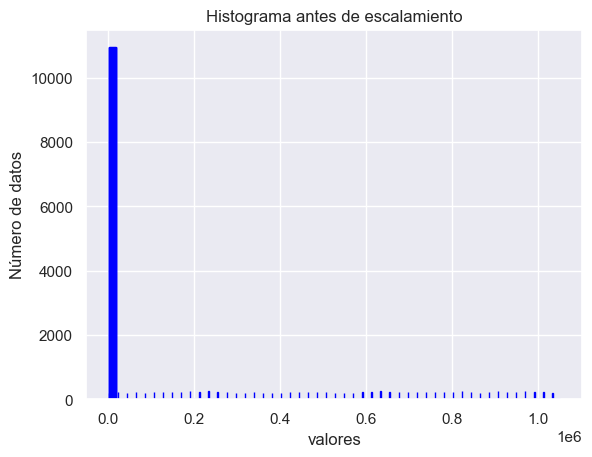

In [ ]:
plt.hist(X, 50, edgecolor='blue')
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma antes de escalamiento')
plt.show()

Escalamos los datos haciendo uso de la clase MaxAbsScaler la cual escala cada valor por su máximo valor absoluto, el cuál no será mayor que 1.0 ni menor de 0.
Posteriormente vemos un gráfica con los datos escalados.

In [ ]:
scaler =MaxAbsScaler()
X[X.columns] = scaler.fit_transform(X)
X_test[X_test.columns] = scaler.fit_transform(X_test)
X

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0         0.071369            0.85        0.921404        0.721585   
1         0.513650            0.50        0.342456        0.990767   
2         0.755487            0.65        0.012632        0.562162   
3         0.016351            0.30        0.592982        0.709647   
4         0.815596            0.20        0.936140        0.340576   
...            ...             ...             ...             ...   
10951     0.962469            0.85        0.408421        0.642232   
10952     0.429002            0.90        0.225263        0.498169   
10953     0.595871            0.40        0.347368        0.219516   
10954     0.866001            0.35        0.997193        0.080627   
10955     0.813875            1.00        0.504561        0.301496   

       count_floors_pre_eq       age  area_percentage  height_percentage  \
0                    0.125  0.000000             0.17            0.09375   
1                    0.125  0.000000             0.03            0.06250   
2                    0.250  0.020101             0.12            0.12500   
3                    0.375  0.005025             0.10            0.25000   
4                    0.250  0.010050             0.14            0.21875   
...                    ...       ...              ...                ...   
10951                0.375  0.020101             0.08            0.18750   
10952                0.125  0.010050             0.10            0.06250   
10953                0.250  0.025126             0.04            0.18750   
10954                0.250  0.010050             0.05            0.15625   
10955                0.250  0.000000             0.07            0.25000   

       land_surface_condition  foundation_type  ...  \
0                         1.0             0.25  ...   
1                         1.0             0.50  ...   
2                         1.0             0.50  ...   
3                         1.0             0.25  ...   
4                         1.0             0.25  ...   
...                       ...              ...  ...   
10951                     0.0             0.50  ...   
10952                     1.0             0.50  ...   
10953                     0.5             0.50  ...   
10954                     1.0             0.50  ...   
10955                     1.0             1.00  ...   

       has_secondary_use_agriculture  has_secondary_use_hotel  \
0                                0.0                      0.0   
1                                0.0                      0.0   
2                                0.0                      0.0   
3                                0.0                      0.0   
4                                0.0                      1.0   
...                              ...                      ...   
10951                            0.0                      0.0   
10952                            0.0                      0.0   
10953                            0.0                      0.0   
10954                            0.0                      0.0   
10955                            0.0                      0.0   

       has_secondary_use_rental  has_secondary_use_institution  \
0                           1.0                            0.0   
1                           0.0                            0.0   
2                           0.0                            0.0   
3                           0.0                            0.0   
4                           0.0                            0.0   
...                         ...                            ...   
10951                       0.0                            0.0   
10952                       0.0                            0.0   
10953                       0.0                            0.0   
10954                       0.0                            0.0   
10955                       0.0                            0.0   

       has_seconda

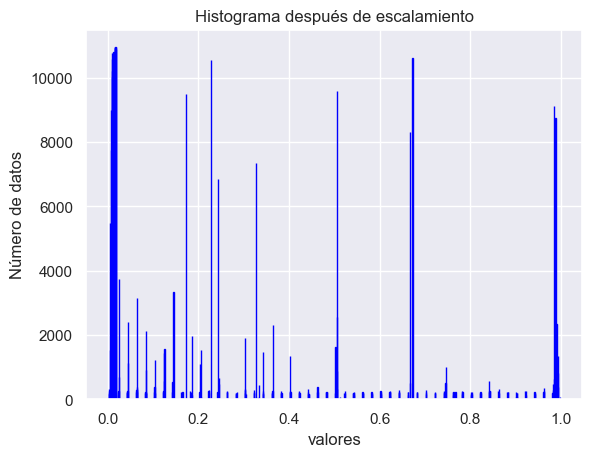

In [ ]:
plt.hist(X, 50, edgecolor="blue")
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma después de escalamiento')
plt.show()

# Selección de modelo : Lazy Predict

Vamos a usar la librería lazy predict que nos servirá para tener una primera vista de los modelo más precisos para el problema, tener en cuenta que todos los modelos que aparecen son entrenados con los parámetros que vienen por defecto.

Primero instalamos lazypredict

In [ ]:
!pip install lazypredict

Separamos datos y entrenamos.

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X, y,test_size=0.3,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, x_test, Y_train, y_test)
models

100%|██████████| 29/29 [00:33<00:00,  1.16s/it]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.48               0.54    None      0.48   
LGBMClassifier                     0.70               0.53    None      0.68   
BaggingClassifier                  0.67               0.53    None      0.65   
DecisionTreeClassifier             0.60               0.52    None      0.60   
ExtraTreesClassifier               0.67               0.51    None      0.65   
GaussianNB                         0.34               0.51    None      0.21   
Perceptron                         0.56               0.51    None      0.56   
RandomForestClassifier             0.69               0.51    None      0.66   
BernoulliNB                        0.62               0.50    None      0.56   
LinearDiscriminantAnalysis         0.65               0.50    None      0.58   
QuadraticDiscriminantAnalysis      0.37               0.49    None      0.33   
ExtraTreeClassifier                0.58               0.49    None      0.59   
AdaBoostClassifier                 0.67               0.48    None      0.62   
LabelPropagation                   0.56               0.47    None      0.57   
LabelSpreading                     0.56               0.47    None      0.56   
KNeighborsClassifier               0.62               0.46    None      0.60   
SGDClassifier                      0.65               0.46    None      0.55   
LogisticRegression                 0.66               0.45    None      0.58   
CalibratedClassifierCV             0.66               0.45    None      0.58   
LinearSVC                          0.66               0.44    None      0.57   
RidgeClassifierCV                  0.66               0.44    None      0.57   
RidgeClassifier                    0.66               0.44    None      0.57   
PassiveAggressiveClassifier        0.57               0.42    None      0.57   
SVC                                0.66               0.42    None      0.57   
DummyClassifier                    0.65               0.33    None      0.51   

                               Time Taken  
Model                                      
NearestCentroid                      0.03  
LGBMClassifier                       0.36  
BaggingClassifier                    0.65  
DecisionTreeClassifier               0.09  
ExtraTreesClassifier                 1.01  
GaussianNB                           0.03  
Perceptron                           0.06  
RandomForestClassifier               1.11  
BernoulliNB                          0.05  
LinearDiscriminantAnalysis           0.22  
QuadraticDiscriminantAnalysis        0.06  
ExtraTreeClassifier                  0.03  
AdaBoostClassifier                   0.62  
LabelPropagation                     4.65  
LabelSpreading                       4.92  
KNeighborsClassifier                 0.87  
SGDClassifier                        0.24  
LogisticRegression                   0.28  
CalibratedClassifierCV              10.56  
LinearSVC                            2.45  
RidgeClassifierCV                    0.16  
RidgeClassifier                      0.05  
PassiveAggressiveClassifier          0.06  
SVC                                  4.91  
DummyClassifier                      0.02

# Dendograma 

Herramienta que nos sirve para poder eliminar columnas viendo viendo la dependencia que puede tener con las demás columnas.

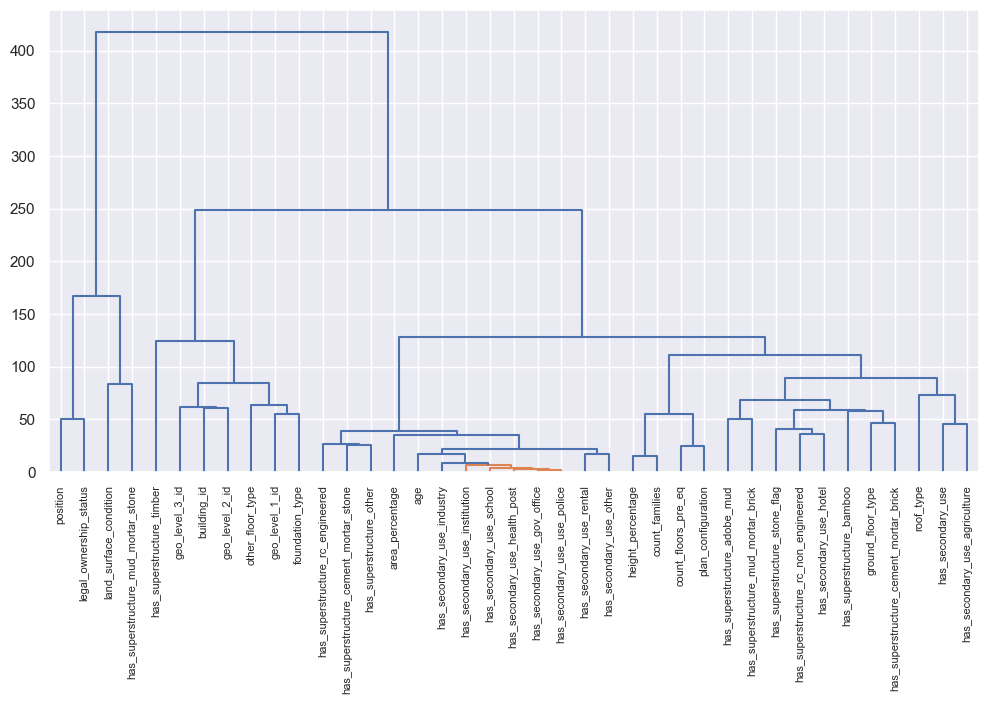

In [ ]:
import sklearn.neighbors
from scipy import cluster

Xt = X.T
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean') 
D = dist.pairwise(Xt)
avD = np.average(D)
# 2. Constuimos el dendograma	
	
plt.figure(figsize=(12, 6))
threshold_2 = 7
# Seleccionamos como distancia intercluster el vecino más alejado (complete)
clusters = cluster.hierarchy.linkage(D, method='complete')
cluster.hierarchy.dendrogram(clusters, color_threshold=threshold_2, labels=X.columns.to_list(), leaf_rotation=90)
plt.show()

Voy a dejar todas las características como ya dije al principio y no voy a cambiar nada.

# Random forest

El primer modelo va a ser el random forest ya que es un modelo de los cuales devuelve una buena presición de F1 score,sin embargo tras realizar la hiperparametrización, entrenar y predecir vemos como en la competición, el resultado es mucho menor que los otros 2 modelos.El motivo por el cuál ocurre esto desde mi punto de vista, puede ser debido a los parámetros de la hiperparametrización.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from random import randint

# hacer el árbol

tree = RandomForestClassifier()

param_dist = {
    "n_estimators": [50, 100, 150, 200, 250, 300,350,400,450,500],
    "criterion": ["gini", "entropy"],
    "max_depth": [None] + [randint(1, 50) for i in range(9)],
    "min_samples_split": [2, 5, 10, 15, 20],
    "min_samples_leaf": [2, 5, 10, 15, 20],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False],
    "class_weight": [None, "balanced", "balanced_subsample"]
}
# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(tree, 
                                 param_distributions = param_dist, 
                                 n_iter=100,
                                cv=5,
                                n_jobs=-1,
                                verbose=2)

# Fit the random search object to the data
rand_search.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 12, 26, 17, 28, 24,
                                                      37, 34, 33, 5],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [2, 5, 10, 15, 20],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                   

Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
final_tree = rand_search.best_estimator_ 
final_tree.fit(X, y)
scores = cross_val_score(final_tree,X,y,cv=5)
print("%0.2f precisión con una desviación estándar de %0.2f" % (scores.mean(), scores.std()))

0.71 precisión con una desviación estándar de 0.01


Predicción

In [ ]:
y_pred = final_tree.predict(X_test)

F1 score

In [ ]:
from sklearn.metrics import f1_score
score =  f1_score(y,y_pred[0:len(y)],labels=[1,2,3],average='micro')
print("precisión del modelo:  %0.2f" % (score))

precisión del modelo:  0.59


Guardar submission

In [ ]:
submission =  pd.read_csv(url+'submission_format.csv',sep=',')
submission['damage_grade'] = y_pred
submission.to_csv('tree.csv', index=False)  

Gráfica que representa cuales han sido las variables más importantes para el entrenamiento del modelo en árbol.

<AxesSubplot:>

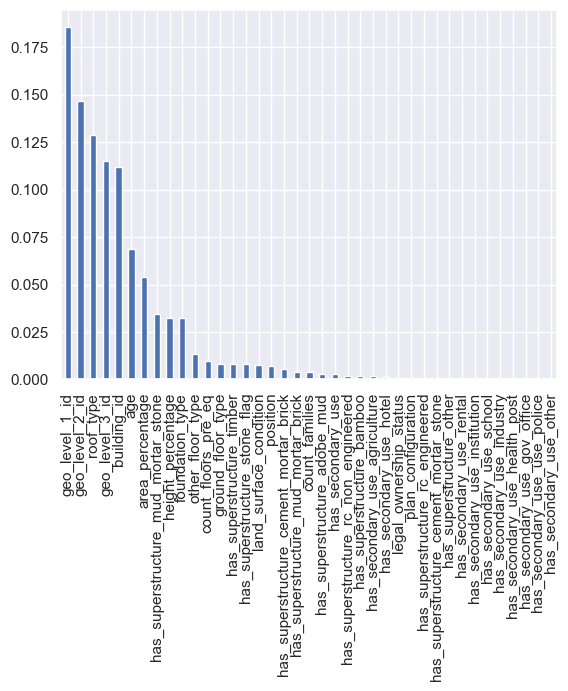

In [ ]:
feature_importances = pd.Series(final_tree.feature_importances_, index=  X.columns).sort_values(ascending=False)
# Plot a simple bar chart
feature_importances.plot.bar()

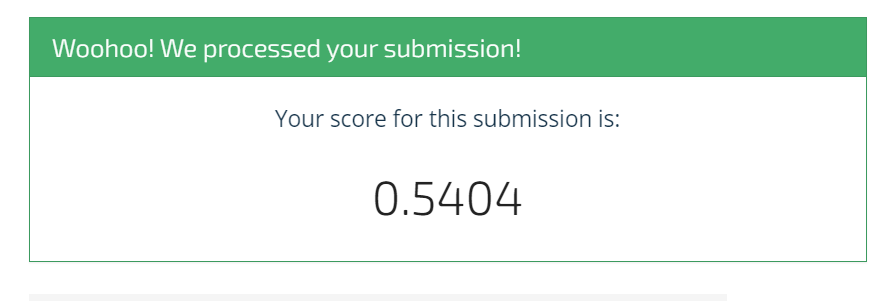

Matriz de Confusión

Text(0.5, 1.0, 'Exactitud: 0.709019187652207')

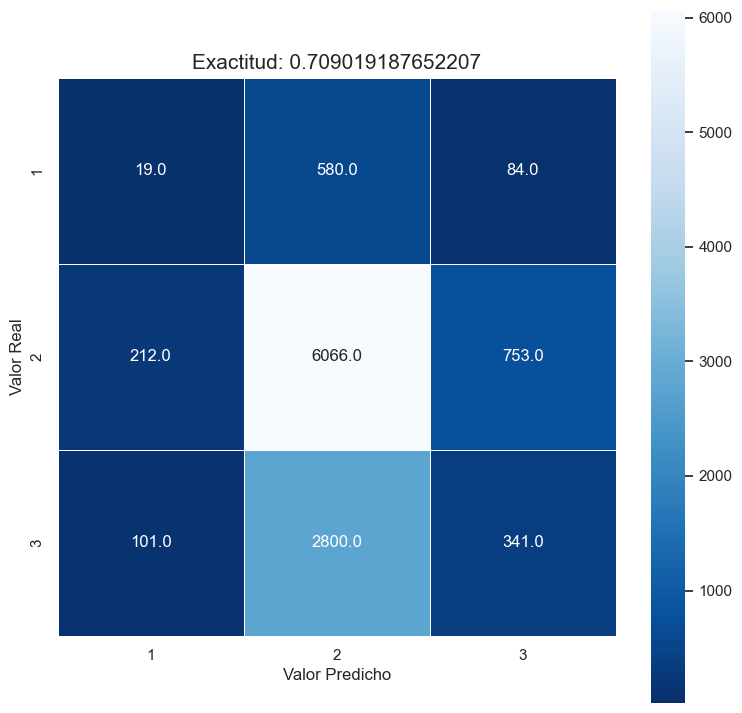

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred[0:len(y)], labels=[1,2,3])
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r',yticklabels=[1,2,3],xticklabels=[1,2,3])
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
all_sample_title = 'Exactitud: {0}'.format(scores.mean())
plt.title(all_sample_title, size = 15)

Vemos como el modelo es muy preciso con los daños 2 y 3, en cambio con el daño de nivel 1 no hay demasiada exactitud.

# Hiperparamterización modelo SVM

Preparamos los hiperparámetros del modelo svm y entrenamos para obtener el mejor estimador.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_distributions = {
    'C': [1,2,3,4,5,6,7,8,9,10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear', 'sigmoid']
}
model_svc = SVC()
hiper_svc = RandomizedSearchCV(estimator = model_svc, param_distributions = param_distributions, cv=5, n_jobs=-1)

# Fit the random search model
hiper_svc.fit(X, y)

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'linear', 'sigmoid']})

In [ ]:
def report(results, n_top=3): # Función para mostrar resultados
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
report(hiper_svc.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: 0.648 (std: 0.002)
Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 8}

Model with rank: 2
Mean validation score: 0.648 (std: 0.001)
Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 9}

Model with rank: 3
Mean validation score: 0.647 (std: 0.003)
Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 6}

Model with rank: 4
Mean validation score: 0.646 (std: 0.001)
Parameters: {'kernel': 'linear', 'gamma': 'scale', 'C': 3}

Model with rank: 5
Mean validation score: 0.646 (std: 0.001)
Parameters: {'kernel': 'linear', 'gamma': 'auto', 'C': 5}

Model with rank: 5
Mean validation score: 0.646 (std: 0.001)
Parameters: {'kernel': 'linear', 'gamma': 'scale', 'C': 5}



Mejores parámetros

In [ ]:
hiper_svc.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'C': 8}

# Modelo SVM

Tras obtener el mejor estimador, volvemos a entrenar, hacer la técnica de cross validation y por último la predicción.

Después de ese proceso calculamos el f1 score de tipo micro, guardamos los resultados para subir a la competición y mostramos la matriz de confusión.

In [ ]:
svc = hiper_svc.best_estimator_

Entrenamiento

In [ ]:
from sklearn.model_selection import cross_val_score

svc.fit(X,y)

scores = cross_val_score(svc,X,y,cv=5)
print("%0.2f precisión con una desviación estándar de %0.2f" % (scores.mean(), scores.std()))

0.65 precisión con una desviación estándar de 0.00


Predicción

In [ ]:
y_pred = svc.predict(X_test)

Guardamos los resultados

In [ ]:
y_pred = pd.DataFrame(y_pred)
submission =  pd.read_csv(url+'submission_format.csv',sep=',')
submission['damage_grade'] = y_pred
submission.to_csv('svm_prediction.csv', index=False)  

F1 score

In [ ]:
from sklearn.metrics import f1_score
score =  f1_score(y,y_pred[0:len(y)],labels=[1,2,3],average='micro')
print("precisión del modelo:  %0.2f" % (score))

precisión del modelo:  0.62


Matriz de confusión

Text(0.5, 1.0, 'Exactitud: 0.6484811909825889')

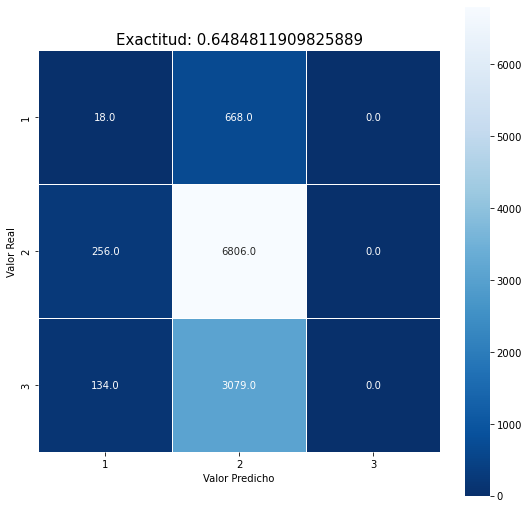

In [ ]:

cm = confusion_matrix(y, y_pred[0:len(y)], labels=[1,2,3])
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r',yticklabels=[1,2,3],xticklabels=[1,2,3])
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
all_sample_title = 'Exactitud: {0}'.format(scores.mean())
plt.title(all_sample_title, size = 15)

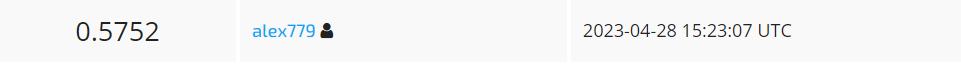

# KNN DE CLASIFICACIÓN

# PARAMETRIZACIÓN

Hacemos para este modelo una hiperparametrización de tipo gridsearch y entrenamos para obtener el mejor estimador.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9,12],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],   
}

knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 12],
                         'weights': ['uniform', 'distance']})

In [ ]:
report(grid_search.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: 0.651 (std: 0.005)
Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}

Model with rank: 1
Mean validation score: 0.651 (std: 0.005)
Parameters: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}

Model with rank: 1
Mean validation score: 0.651 (std: 0.005)
Parameters: {'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}

Model with rank: 1
Mean validation score: 0.651 (std: 0.005)
Parameters: {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}

Model with rank: 5
Mean validation score: 0.650 (std: 0.008)
Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'uniform'}

Model with rank: 5
Mean validation score: 0.650 (std: 0.008)
Parameters: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'uniform'}

Model with rank: 5
Mea

In [ ]:
grid_search.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 12,
 'weights': 'distance'}

# ELECCIÓN DE MODELO Y CROSS VALIDATION

Elegimos el modelo, lo entrenamos, obtenemos precisión y f1 score para comprobar con nuestros datos originales, predecimos con los datos de test y mostramos las matriz de confusión.

In [ ]:
knn_chosen = grid_search.best_estimator_

Entrenamiento y Cross validation

In [ ]:
knn_chosen.fit(X,y)

scores = cross_val_score(knn_chosen,X,y,cv=5)
print("%0.2f precisión con una desviación estándar de %0.2f" % (scores.mean(), scores.std()))

0.65 precisión con una desviación estándar de 0.00


F1 score

In [ ]:
score = f1_score(y,y_pred[0:len(y)],labels=[1,2,3],average='micro')
print("precisión del modelo:  %0.2f" % (score))

precisión del modelo:  0.62


Predicción y guardado de resultados

In [ ]:
y_pred = knn_chosen.predict(X_test)
y_pred
submission =  pd.read_csv(url+'submission_format.csv',sep=',')
submission['damage_grade'] = y_pred
submission.to_csv('knn_prediction.csv', index=False)  

Matriz de confusión

Text(0.5, 1.0, 'Exactitud: 0.6507623793024255')

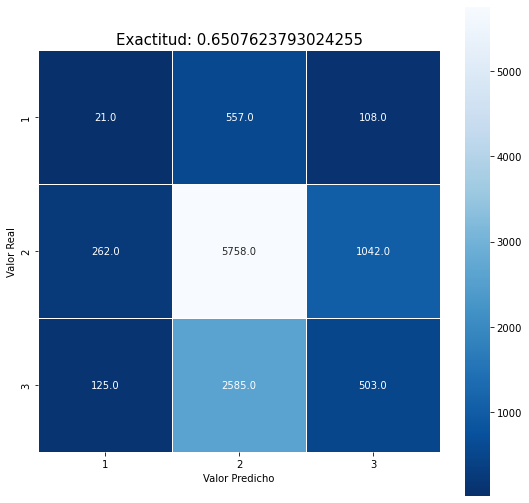

In [ ]:
cm = confusion_matrix(y, y_pred[0:len(y)], labels=[1,2,3])
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r',yticklabels=[1,2,3],xticklabels=[1,2,3])
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
all_sample_title = 'Exactitud: {0}'.format(scores.mean())
plt.title(all_sample_title, size = 15)

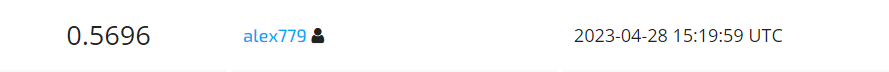